## Final Project
#### Names: Sammy Park and Victoria Ok

### Spotify Tracks Dataset from huggingface.co
(https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)

### Data Description:
The dataset comprises information on various music tracks available on Spotify, encompassing diverse attributes such as artist details, album names, track names, popularity scores, duration, explicit content, and musical traits like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, and track genre. The popularity score, ranging from 0 to 100, is algorithmically determined based on the track's play count and recency. Additionally, the dataset includes details about the presence of explicit lyrics, dance suitability, acoustic nature, instrumental content, live performance likelihood, and the emotional tone conveyed by each track. 

### Basic Information about the Data:
- size: 17.5+ MB
- number of entries (rows): 114,000
- number of features (columns): 21
- number of categorical columns: 6
- number of numerical columns: 15
- columns with missing values: `artists`, `album_name`, `track_name`

### Key Variables:

- `track_genre`: The genre in which the track belongs
- `popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular, calculated algorithmically based on the total plays and recency of a track. Current plays contribute more to higher popularity. Duplicate tracks are independently rated, and artist/album popularity is derived from track popularity.
- `duration_ms`: The track length in milliseconds
- `explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- `loudness`: The overall loudness of a track in decibels (dB)
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- `speechiness`: Speechiness measures the presence of spoken words in a track. A value close to 1.0 indicates exclusively spoken content, with values above 0.66 suggesting entirely spoken tracks. Values between 0.33 and 0.66 indicate a mix of music and speech, such as rap, while values below 0.33 likely represent non-speech-like music tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM).
- `time_signature`: An estimated time signature. The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

### Question: 
#### Can we predict the popularity of songs based on their musical features?

(duration, explicitness, danceability, energy, key, loudness, modality of the track, speech presence, acousticness, instrumentalness, liveness, valence, tempo, and time signature)

### Goal:
#### To develop a predictive model for song popularity, aiming to assess and compare the popularity of a user's top 10 songs based on their musical features in relation to the top tracks.

### Load Libraries & Data

In [1]:
### Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for data pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Libraries for kMeans clustering
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Libraries for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Libraries for model evaluation and metrics
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
### Load and preview the dataset
spotify = pd.read_csv("/Users/SammyCPark/Desktop/DS3001/DS-3001/spotify_dataset.csv")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Data Cleaning

In [4]:
# Drop the index column, as it is an unnecessary column
# Drop the track_id column, because it is a unique identifier 
spotify = spotify.drop(['index', 'track_id'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
# Convert 'duration_ms' into 'duration_sec' (ms to s) for user readability
spotify['duration_sec'] = spotify['duration_ms']/1000
spotify = spotify.drop(['duration_ms'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [6]:
# See how many categories exist in track_genre (114)
genres = spotify["track_genre"].value_counts()
genres

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [7]:
# Compress track_genre into smaller categories
def categorize_genre(genre):
    if genre in ["hip-hop", "power-pop", "pop-film", "pop", "mandopop", "k-pop", "j-pop", "j-idol", "cantopop"]:
        return "Pop_HipHop"
    elif genre in ["electronic", "electro", "edm", "dub", "dubstep", "groove", "idm", "breakbeat", "minimal-techno", "techno", "synth-pop", "detroit-techno", "party", "club"]:
        return "Electronic"
    elif genre in ["progressive-house", "afrobeat", "house", "chicago-house", "drum-and-bass", "tango", "reggaeton", "reggae", "disco", "deep-house", "dancehall", "dance", "funk", "garage", "samba", "salsa", "trance"]:
        return "Dance"
    elif genre in ["mpb", "malay", "latino", "latin", "j-rock", "j-dance", "world-music", "german", "french", "british", "brazil", "iranian", "turkish", "anime", "forro", "sertanejo", "indian", "swedish", "spanish", "trip-hop", "pagode", "ska"]:
        return "World"
    elif genre in ["songwriter", "singer-songwriter", "indie-pop", "indie", "bluegrass", "folk", "country", "honky-tonk", "alternative"]:
        return "Indie_Country"
    elif genre in ["punk", "metalcore", "metal", "psych-rock", "punk-rock", "heavy-metal", "hardstyle", "hardcore", "hard-rock", "black-metal", "alt-rock", "rockabilly", "rock-n-roll", "rock", "death-metal", "grunge", "grindcore", "goth", "emo", "industrial"]:
        return "Metal_Rock"
    elif genre in ["acoustic", "piano", "jazz", "blues", "r-n-b", "ambient", "soul", "guitar", "gospel", "opera", "classical"]:
        return "Blues_Instrumental"
    elif genre in ["kids", "study", "sleep", "show-tunes", "disney", "comedy", "children", "sad", "romance", "happy", "chill", "new-age"]:
        return "Tunes"

In [8]:
# Apply the categorization function to the 'track_genre' column

spotify['genre_condensed'] = spotify['track_genre'].apply(categorize_genre)

In [9]:
# Convert 'track_genre' into a category type
spotify["track_genre"] = spotify["track_genre"].astype("category")

In [10]:
# One hot encoding track_genre 
ordinal_encoder = OrdinalEncoder()
spotify[['track_genre']] = ordinal_encoder.fit_transform(spotify[['track_genre']])
spotify[['track_genre']].value_counts()

track_genre
0.0            1000
85.0           1000
83.0           1000
82.0           1000
81.0           1000
               ... 
34.0           1000
33.0           1000
32.0           1000
31.0           1000
113.0          1000
Name: count, Length: 114, dtype: int64

In [11]:
# View the encoded categories of track_genre
ordinal_encoder.categories_

[array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
        'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
        'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
        'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film

In [12]:
# view the null rows
spotify[spotify.isna().any(axis=1)]

,Unnamed: 0,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec,genre_condensed
65900,65900,NaN,NaN,NaN,0,False,0.501,0.583,7,-9.46,...,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,65.0,0.0,Pop_HipHop


In [13]:
# Drop the one value that has null values
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

## Exploratory Data Analysis

In [14]:
# Output basic statistics from the numerical features
spotify.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,56.499925,228.031153
std,32909.243463,22.304959,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,32.907978,107.296058
min,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,28499.500000,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,28.000000,174.066000
50%,56999.000000,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.000000,212.906000
75%,85499.500000,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000,261.506000
max,113999.000000,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000,5237.295000


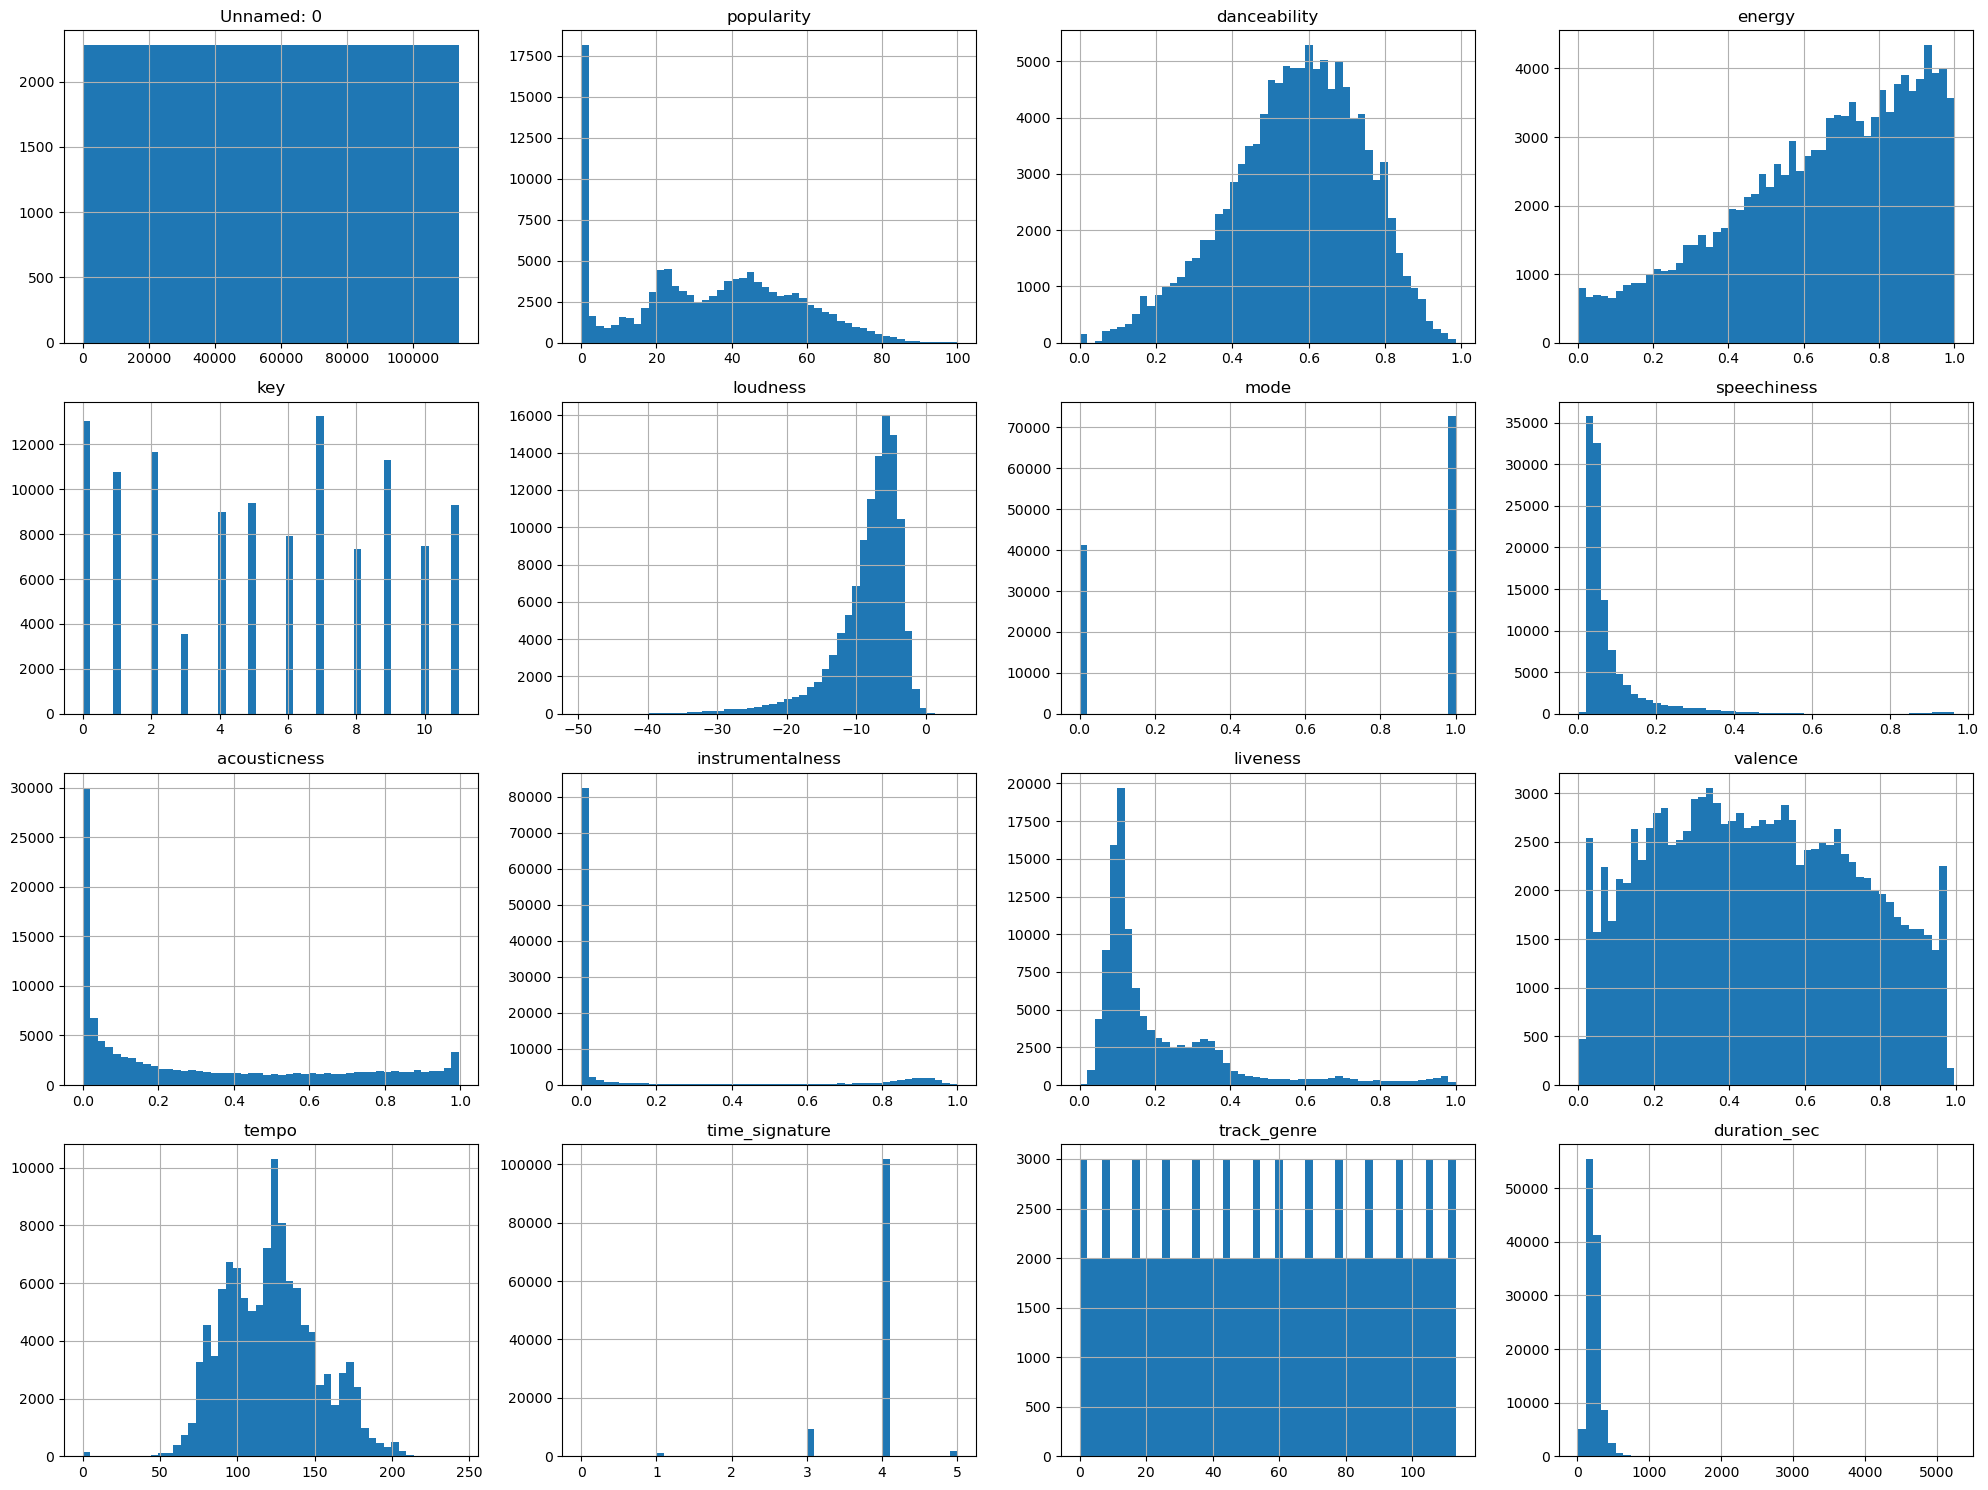

In [15]:
# Visualize numerical data as histograms to understand general distributions
spotify.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# TODO: add comments on the histogram

In [68]:
spotify[['genre_condensed']] = OrdinalEncoder().fit_transform(spotify[['genre_condensed']])
spotify[['genre_condensed']].value_counts()

genre_condensed
7.0                22000
4.0                20000
1.0                17000
2.0                14000
6.0                12000
0.0                11000
3.0                 9000
5.0                 8999
Name: count, dtype: int64

#### Correlations

In [69]:
spotify_num_corr = spotify.drop(columns=['artists','album_name','track_name'], axis=1)[0:10000]

In [70]:
correlations = spotify_num_corr.corr()
correlations.shape

(18, 18)

In [71]:
correlations["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.173599
loudness            0.089311
instrumentalness    0.054035
key                 0.039358
duration_sec        0.030250
explicit            0.026510
speechiness         0.021778
tempo               0.021194
valence             0.001637
time_signature     -0.005284
liveness           -0.018485
mode               -0.022675
genre_condensed    -0.080018
danceability       -0.080905
track_genre        -0.108663
Unnamed: 0         -0.115758
acousticness       -0.166854
Name: popularity, dtype: float64

array([[<Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='loudness', ylabel='popularity'>,
        <Axes: xlabel='valence', ylabel='popularity'>,
        <Axes: xlabel='energy', ylabel='popularity'>],
       [<Axes: xlabel='popularity', ylabel='loudness'>,
        <Axes: xlabel='loudness', ylabel='loudness'>,
        <Axes: xlabel='valence', ylabel='loudness'>,
        <Axes: xlabel='energy', ylabel='loudness'>],
       [<Axes: xlabel='popularity', ylabel='valence'>,
        <Axes: xlabel='loudness', ylabel='valence'>,
        <Axes: xlabel='valence', ylabel='valence'>,
        <Axes: xlabel='energy', ylabel='valence'>],
       [<Axes: xlabel='popularity', ylabel='energy'>,
        <Axes: xlabel='loudness', ylabel='energy'>,
        <Axes: xlabel='valence', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>]], dtype=object)

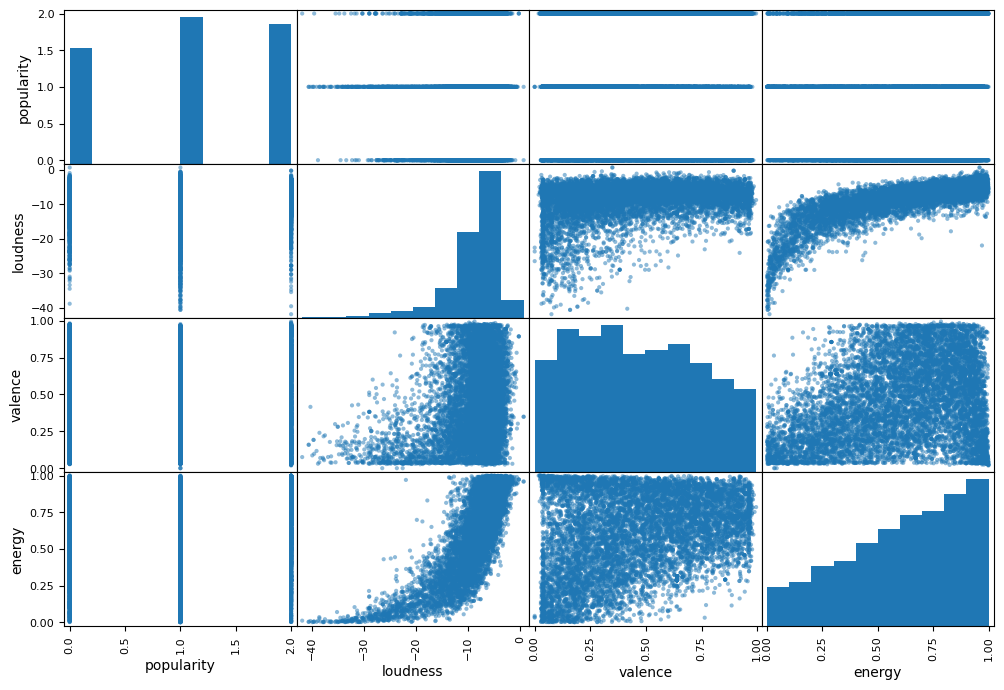

In [72]:
from pandas.plotting import scatter_matrix

# plot the correlations
attributes = ["popularity", "loudness", "valence", "energy"]
scatter_matrix(spotify_num_corr[attributes], figsize=(12, 8))

In [23]:
# viewing the histogram, we saw that many songs had a popularity of 0, and wanted to investigate
zero_pop = spotify[(spotify['popularity']==0)]
zero_pop

,Unnamed: 0,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec,genre_condensed
23,23,Jason Mraz,Coffee Moment,93 Million Miles,0,False,0.572,0.454,3,-10.286,...,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,0.0,216.386,Blues_Instrumental
24,24,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,False,0.796,0.667,5,-4.831,...,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,0.0,231.266,Blues_Instrumental
26,26,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,False,0.620,0.309,5,-9.209,...,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760,Blues_Instrumental
27,27,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,False,0.633,0.429,4,-6.784,...,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,0.0,273.653,Blues_Instrumental
28,28,Jason Mraz,Christmas Time,Winter Wonderland,0,False,0.620,0.309,5,-9.209,...,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760,Blues_Instrumental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,113046,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,False,0.696,0.715,7,-7.741,...,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,113.0,117.226,World
113047,113047,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,False,0.581,0.436,8,-7.936,...,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,113.0,175.426,World
113048,113048,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,False,0.413,0.437,1,-7.983,...,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,113.0,193.653,World
113049,113049,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,False,0.607,0.884,2,-4.059,...,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,113.0,217.120,World


Viewing the statistics of our target variable, we want to categorize the popularity variable into 3 classes: low, average, and high popularity. After calculating the mean to be a score 33.239 and the standard deviation to be 22.305, we separate the classes by one standard deviation below and above the mean rounded down - [10, 55]. 

In [24]:
print("33rd: ", np.percentile(spotify['popularity'], 33))
print("67rd: ", np.percentile(spotify['popularity'], 67))

33rd:  22.0
67rd:  45.0


In [25]:
# Factor popularity to 3 levels of low, average, and high to create our classifier variable
spotify['popularity'] = spotify.popularity.apply(lambda x: "low" if x <= 22
                                                         else ("average" if (x > 22 and x <=45)
                                                         else "high")).astype("category")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        113999 non-null  int64   
 1   artists           113999 non-null  object  
 2   album_name        113999 non-null  object  
 3   track_name        113999 non-null  object  
 4   popularity        113999 non-null  category
 5   explicit          113999 non-null  bool    
 6   danceability      113999 non-null  float64 
 7   energy            113999 non-null  float64 
 8   key               113999 non-null  int64   
 9   loudness          113999 non-null  float64 
 10  mode              113999 non-null  int64   
 11  speechiness       113999 non-null  float64 
 12  acousticness      113999 non-null  float64 
 13  instrumentalness  113999 non-null  float64 
 14  liveness          113999 non-null  float64 
 15  valence           113999 non-null  float64 
 16  tempo  

Duplicates, based on the documentation are the same tracks, but either from a single or an album. We have decided to drop any duplicates because the only difference between the two samples would essentially be the album name. 

In [26]:
duplicated = spotify.duplicated()
duplicate_indices = duplicated.index[duplicated == True].tolist()
len(duplicate_indices)

0

In [27]:
spotify = spotify.drop(duplicate_indices)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        113999 non-null  int64   
 1   artists           113999 non-null  object  
 2   album_name        113999 non-null  object  
 3   track_name        113999 non-null  object  
 4   popularity        113999 non-null  category
 5   explicit          113999 non-null  bool    
 6   danceability      113999 non-null  float64 
 7   energy            113999 non-null  float64 
 8   key               113999 non-null  int64   
 9   loudness          113999 non-null  float64 
 10  mode              113999 non-null  int64   
 11  speechiness       113999 non-null  float64 
 12  acousticness      113999 non-null  float64 
 13  instrumentalness  113999 non-null  float64 
 14  liveness          113999 non-null  float64 
 15  valence           113999 non-null  float64 
 16  tempo  

In [28]:
# Check that all duplicates were removed
spotify.duplicated().index[spotify.duplicated() == True].tolist()

[]

In [29]:
# Check 
spotify[['popularity']].value_counts()

popularity
low           38874
average       38683
high          36442
Name: count, dtype: int64

In [30]:
# One hot encoding popularity for classification
spotify[['popularity']] = OrdinalEncoder().fit_transform(spotify[['popularity']])
spotify[['popularity']].value_counts()

popularity
2.0           38874
0.0           38683
1.0           36442
Name: count, dtype: int64

- 0 corresponds with average popularity
- 1 corresponds with high popularity
- 2 corresponds with low popularity

## Methods

### kMeans Clustering
Employ kMeans clustering as a data exploration technique to uncover underlying patterns and structures within the dataset, allowing for the identification of general trends, associations, or distinctive patterns in the data.

In [33]:
# Subset data without the artist, album name, and track name to create numerical dataset
spotify_num = spotify.drop(columns=['artists','album_name','track_name'], axis=1)
spotify_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   popularity        113999 non-null  float64
 2   explicit          113999 non-null  bool   
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  float64
 16  duration_sec      113999 

In [34]:
# Scale the data for kmeans
spotify_scaled_kmeans = pd.DataFrame(MinMaxScaler().fit_transform(spotify_num))

In [35]:
# # Run data through kmeans model for 3 clusters
spotify_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(spotify_scaled_kmeans)

In [36]:
spotify_kmeans.labels_

array([0, 1, 1, ..., 0, 2, 0], dtype=int32)

In [37]:
spotify_kmeans.predict(spotify_scaled_kmeans)

array([0, 1, 1, ..., 0, 2, 0], dtype=int32)

Text(0, 0.5, 'loudness')

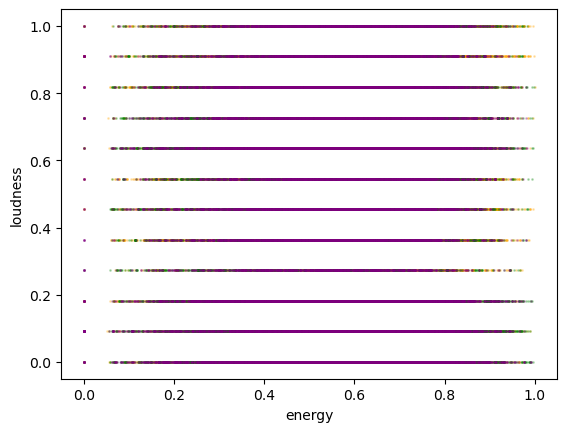

In [38]:
group1 = spotify_scaled_kmeans[spotify_kmeans.labels_ == 0]
group2= spotify_scaled_kmeans[spotify_kmeans.labels_ == 1]
group3 = spotify_scaled_kmeans[spotify_kmeans.labels_ == 2]

plt.scatter(group1[3], group1[5], c="orange", s=1, alpha=0.25)
plt.scatter(group2[3], group2[5], c="green", s=1, alpha=0.25)
plt.scatter(group3[3], group3[5], c="purple", s=1, alpha=0.25)
plt.xlabel("energy")
plt.ylabel("loudness")

Text(0, 0.5, 'valence')

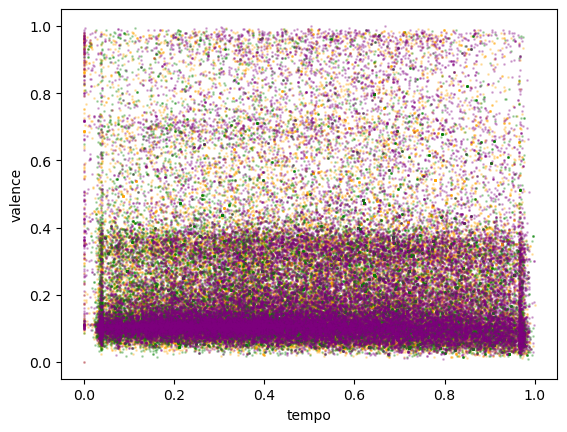

In [39]:
plt.scatter(group1[12], group1[11], c="orange", s=1, alpha=0.25)
plt.scatter(group2[12], group2[11], c="green", s=1, alpha=0.25)
plt.scatter(group3[12], group3[11], c="purple", s=1, alpha=0.25)
plt.xlabel("tempo")
plt.ylabel("valence")

In [40]:
metrics.silhouette_score(spotify_scaled_kmeans, spotify_kmeans.labels_, sample_size=50000)

0.15518271372463877

### Random Forest 
Apply Random Forest to establish a predictive model for song popularity, enabling the assessment and comparison of a user's top 10 songs based on their musical features and their relation to top tracks.

In [41]:
# split the data into predictors and labels
X = spotify.drop(columns=["popularity"], axis=1)
y = spotify['popularity']

In [42]:
# split the data into training, testing, and validation sets
# training: 80%
# testing: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) 

In [43]:
# verify that sets were stratified:
print(y_train.value_counts())
print(y_test.value_counts())

popularity
2.0    31099
0.0    30946
1.0    29154
Name: count, dtype: int64
popularity
2.0    7775
0.0    7737
1.0    7288
Name: count, dtype: int64


In [49]:
X_train_new = X_train.drop(columns=['artists', 'album_name', 'track_name'])
X_test_new = X_test.drop(columns=['artists', 'album_name', 'track_name'])

In [52]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91199 entries, 64683 to 4585
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        91199 non-null  int64  
 1   explicit          91199 non-null  bool   
 2   danceability      91199 non-null  float64
 3   energy            91199 non-null  float64
 4   key               91199 non-null  int64  
 5   loudness          91199 non-null  float64
 6   mode              91199 non-null  int64  
 7   speechiness       91199 non-null  float64
 8   acousticness      91199 non-null  float64
 9   instrumentalness  91199 non-null  float64
 10  liveness          91199 non-null  float64
 11  valence           91199 non-null  float64
 12  tempo             91199 non-null  float64
 13  time_signature    91199 non-null  int64  
 14  track_genre       91199 non-null  float64
 15  duration_sec      91199 non-null  float64
dtypes: bool(1), float64(11), int64(4)
memory u

In [53]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22800 entries, 46856 to 91855
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        22800 non-null  int64  
 1   explicit          22800 non-null  bool   
 2   danceability      22800 non-null  float64
 3   energy            22800 non-null  float64
 4   key               22800 non-null  int64  
 5   loudness          22800 non-null  float64
 6   mode              22800 non-null  int64  
 7   speechiness       22800 non-null  float64
 8   acousticness      22800 non-null  float64
 9   instrumentalness  22800 non-null  float64
 10  liveness          22800 non-null  float64
 11  valence           22800 non-null  float64
 12  tempo             22800 non-null  float64
 13  time_signature    22800 non-null  int64  
 14  track_genre       22800 non-null  float64
 15  duration_sec      22800 non-null  float64
dtypes: bool(1), float64(11), int64(4)
memory 

In [ ]:
# grid_search_for.best_params_

In [54]:
RFC = RandomForestClassifier(n_estimators=1000, 
                max_features= 15, 
                bootstrap= True, 
                max_samples = 10000, 
                oob_score =True, 
                random_state= 42,
                n_jobs=-1,
                verbose=True)

In [55]:
spotify_RFC = RFC.fit(X_train_new, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.0min finished


In [56]:
y_train_pred = spotify_RFC.predict(X_train_new)
y_train_pred

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   17.5s finished


array([2., 1., 2., ..., 0., 0., 0.])

## Model Evaluation and Metrics

In [57]:
print("training balanced accuracy: ", metrics.balanced_accuracy_score(y_train, y_train_pred))

training balanced accuracy:  0.8363537541806306


In [58]:
# precision
print("training precision: ", metrics.precision_score(y_train, y_train_pred, average="weighted"))

training precision:  0.836885274275503


In [59]:
# recall
print("training recall: ", metrics.recall_score(y_train, y_train_pred, average='weighted'))

training recall:  0.8371802322393886


In [60]:
# accuracy
print("training accuracy: ", spotify_RFC.score(X_train_new, y_train))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   11.6s


training accuracy:  0.8371802322393886


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   14.3s finished


In [61]:
# out of bag error:
print('training OOB error rate: ' + str(1-spotify_RFC.oob_score_))

training OOB error rate: 0.2333907170034759


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   14.2s finished


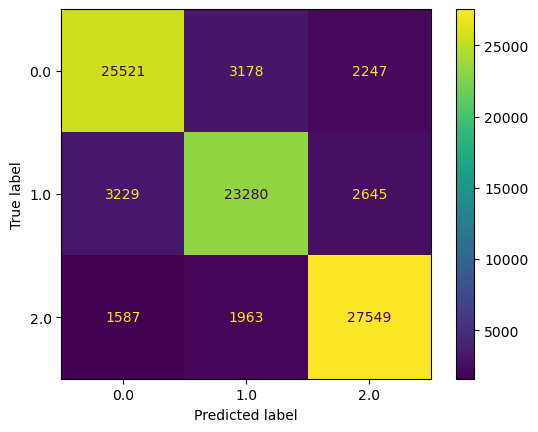

In [62]:
ConfusionMatrixDisplay.from_estimator(spotify_RFC, X_train_new, y_train)

In [63]:
print(pd.DataFrame(spotify_RFC.feature_importances_,index = X_train_new.columns, columns=['importance']).sort_values('importance', ascending=False))

                  importance
Unnamed: 0          0.330646
acousticness        0.064408
duration_sec        0.064031
track_genre         0.060826
valence             0.056954
danceability        0.056792
speechiness         0.056088
loudness            0.054549
energy              0.053169
instrumentalness    0.052741
liveness            0.052662
tempo               0.052463
key                 0.028423
mode                0.006643
time_signature      0.004963
explicit            0.004643


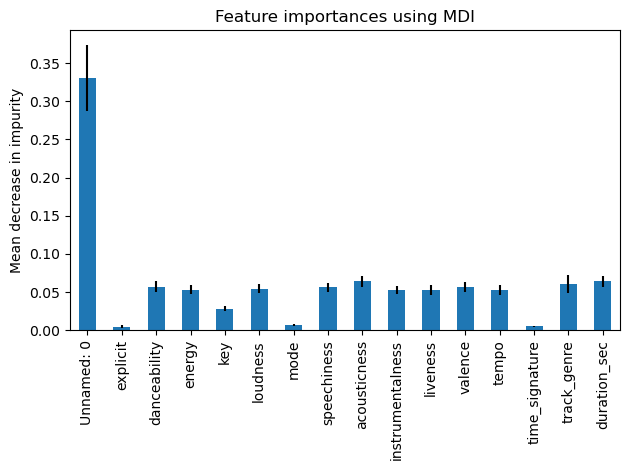

In [64]:
#Here we compute both the mean and standard
# deviation of accumulation of the impurity decrease within each tree.
importances = spotify_RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in spotify_RFC.estimators_], axis=0)

#graph it
forest_importances = pd.Series(importances, index=X_train_new.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [67]:
n_estimators_list = [100,200,300,400,500,600,700,800,900,1000]
forest_list = [RandomForestClassifier( n_estimators = n,
            max_features= 4, #<- Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p)
                    bootstrap= True, #<-Whether bootstrap samples are used when building trees
                    max_samples = 10000,  #<- Size of sample to draw each time.
                    min_samples_leaf= 5, #<- Minimum numbers of data points in terminal nodes.
                    max_leaf_nodes= None, #<- Maximum number of terminal nodes trees in the forest can have. 
                    max_depth= None, #<-The maximum depth of the tree
                    oob_score=True,
                   warm_start=True,
                    random_state= 42).fit(X_train_new, y_train) for n in n_estimators_list]

#Could also do every number from 0 to 1000 but takes a very long time
forest_list[:3]

KeyboardInterrupt: 

In [ ]:
oob_errors = ([1-i.oob_score_ for i in forest_list])
plt.plot(n_estimators_list,oob_errors)
plt.title('Out Of Bag Error Against Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag Error')
plt.show()

In [ ]:
pd.DataFrame(list(zip(n_estimators_list,oob_errors)), columns = ['number of trees','oob_error'])

In [ ]:
max_features_list = [3, 5, 7, 9, 11, 13, 15]

forest_list2 = [RandomForestClassifier(n_estimators = 1000,
            max_features= n, #<- Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p).
                    bootstrap= True, #<-Whether bootstrap samples are used when building trees
                    max_samples = 10000,  #<- Size of sample to draw each time.
                    min_samples_leaf= 5, #<- Minimum numbers of data points in terminal nodes.
                    max_leaf_nodes= None, #<- Maximum number of terminal nodes trees in the forest can have. 
                    max_depth= None, #<-The maximum depth of the tree
                    oob_score=True,
                   warm_start=True,
                    random_state= 42).fit(X_train, y_train) for n in max_features_list]
forest_list2[:3]

On Test Set

In [ ]:
y_test_pred = spotify_RFC.predict(X_test_new)
y_test_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.4s finished


array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
print("testing balanced accuracy: ", metrics.balanced_accuracy_score(y_test, y_test_pred))

testing balanced accuracy:  0.6780097431765136


In [ ]:
# precision
print("testing precision: ", metrics.precision_score(y_test, y_test_pred, average="weighted"))

testing precision:  0.6782748816109548


In [ ]:
# recall
print("testing recall: ", metrics.recall_score(y_test, y_test_pred, average='weighted'))

testing recall:  0.6787274412037241


In [ ]:
# accuracy
print("testing accuracy: ", spotify_RFC.score(X_test_new, y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s


testing accuracy:  0.6787274412037241


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.6s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.7s finished


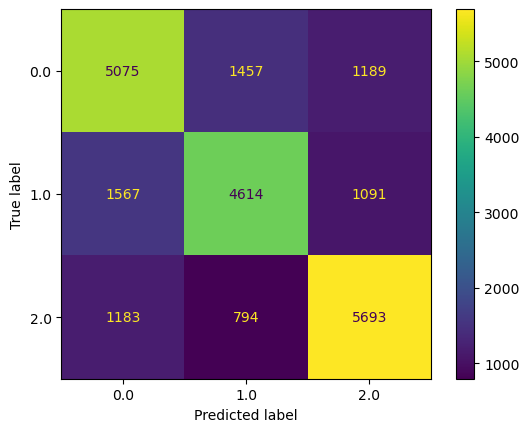

In [ ]:
ConfusionMatrixDisplay.from_estimator(spotify_RFC, X_test_new, y_test)

## Conclusions

## Future Work/Considerations
While the analysis benefited from variables like duration, explicitness, danceability, and others, limitations arose due to each genre having 1000 tracks, potentially resulting in an incomplete representation. Still, the dataset let us see how songs are somewhat normally distributed in popularity. To further the analysis, exploring user-specific factors (individual preferences, demographics, listening history) and external influences (cultural trends, regional preferences) could enhance the model's accuracy in predicting song popularity for diverse user profiles.
